In [64]:
# Определяем оптимальное количество кластеров 
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
# наши данные - файл experted_data.csv
seeds_df = pd.read_csv(
"./expertdata.txt")
# seeds_df = pd.read_csv(
# "./full_expertdata.txt")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования

varieties = list(seeds_df.pop('FirstName')+' '+seeds_df.pop('LastName'))
# # Извлекаем измерения как массив NumPy
samples = seeds_df.values

# # Реализация иерархической кластеризации при помощи функции linkage
# mergings = linkage(samples, method='complete')

# # Строим дендрограмму, указав параметры удобные для отображения
# dendrogram(mergings,
#            labels=varieties,
#            leaf_rotation=90,
#            leaf_font_size=6,
#            )

# plt.show()



In [65]:
points = seeds_df.values

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(12)

real_df = pd.read_csv(
"./full_expertdata.txt")
real_df.pop('FirstName')
real_df.pop('LastName')
# Generate train data
X = 0.3 * rng.randn(10717, 6) + 1 
X_train = np.r_[X + 6, X - 6]
# Generate some regular novel observations
X = 0.3 * rng.randn(150, 6)
X_test = points
# Generate some abnormal novel observations
X_outliers = real_df.values

# fit the model
clf = IsolationForest(max_samples=10717, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
# xx, yy = np.meshgrid(np.linspace(-10, 5, 50), np.linspace(-10, 5, 50))
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.title("Spy")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
#                  s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                 s=20, edgecolor='k')
# plt.axis('tight')
# plt.xlim((0, 50))
# plt.ylim((0, 50))
# plt.legend([b1, b2, c],
#            ["training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left")
# plt.show()

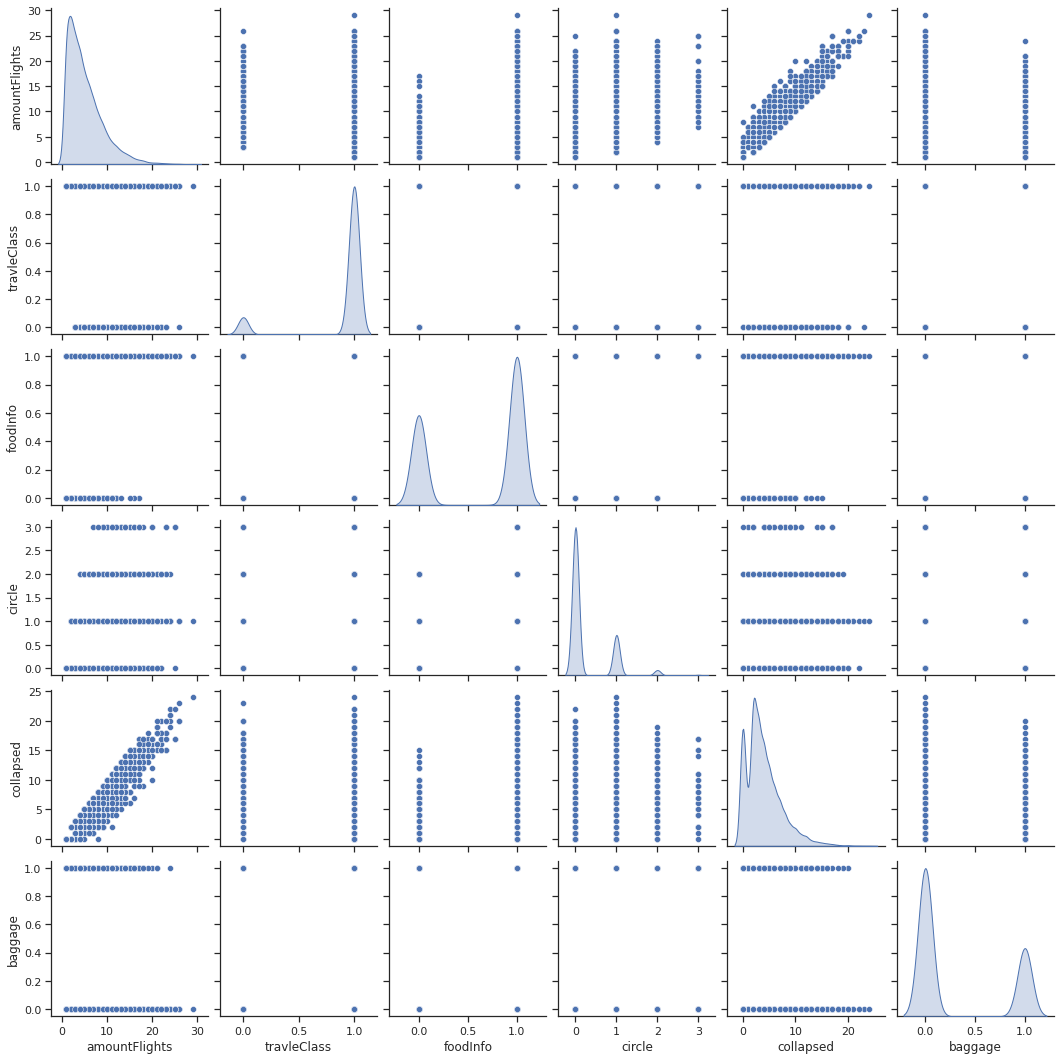

In [67]:
cur_data = pd.DataFrame({'amountFlights': X_outliers[:, 0], 'travleClass': X_outliers[:, 1], 'foodInfo': X_outliers[:,2], 'circle': X_outliers[:,3], 'collapsed': X_outliers[:,4], 'baggage':X_outliers[:,5]})
# print(cur_data)

g = sns.pairplot(cur_data, diag_kind="kde", vars=['amountFlights','travleClass','foodInfo','circle','collapsed','baggage'])

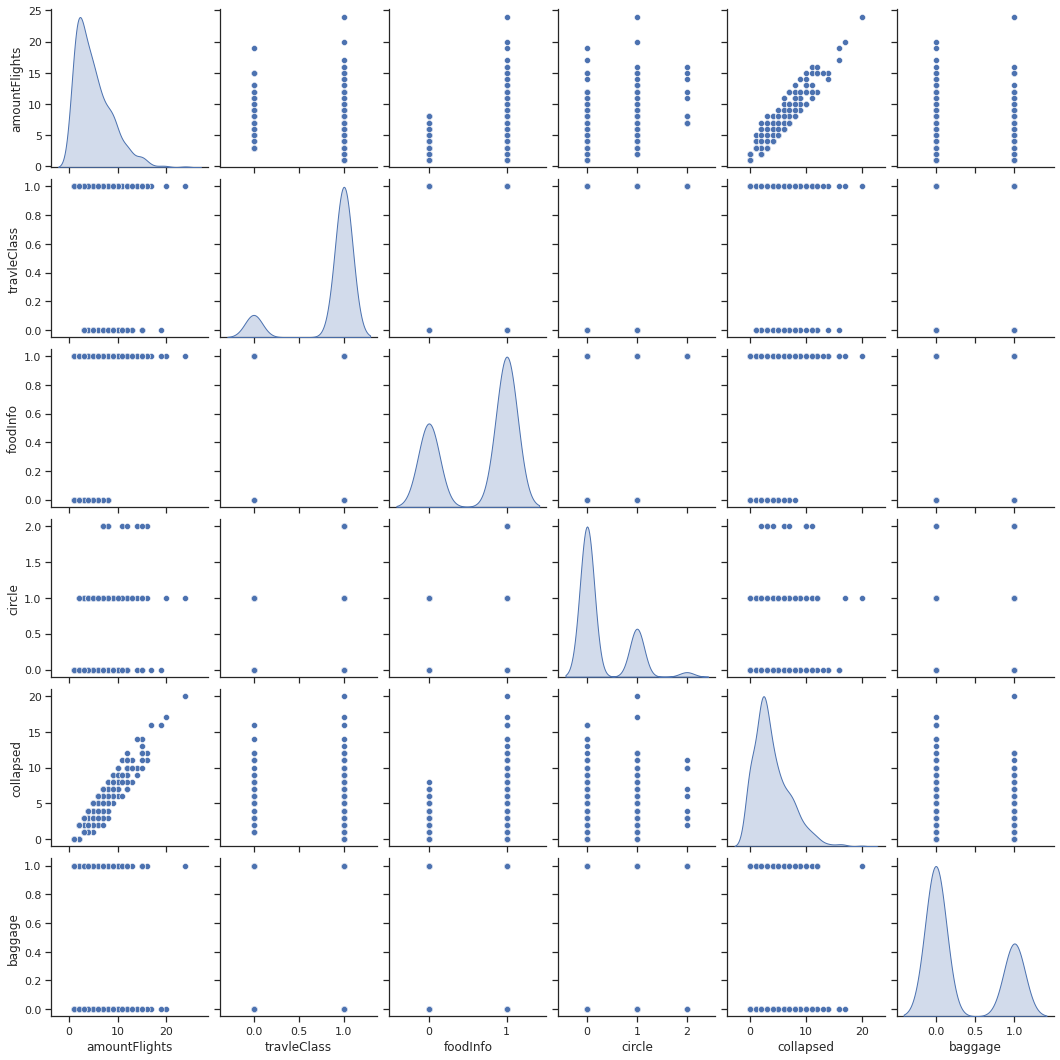

In [68]:
cur_data = pd.DataFrame({'amountFlights': X_test[:, 0], 'travleClass': X_test[:, 1], 'foodInfo': X_test[:,2], 'circle': X_test[:,3], 'collapsed': X_test[:,4], 'baggage':X_test[:,5]})
# print(cur_data)

g = sns.pairplot(cur_data, diag_kind="kde", vars=['amountFlights','travleClass','foodInfo','circle','collapsed','baggage'])